# Page View Time Series Visualizer


For this project you will visualize time series data using a line chart, bar chart,and box plots. 

You will use Pandas, Matplotlib, and Seaborn to visualize adataset containing the number of page views each day on thefreeCodeCamp.org forum from 2016-05-09 to 2019-12-03.

The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth

In [2]:
#Importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Extracting the data 

df = pd.read_csv("C:/Users/Sicelo/Documents/FreeCodeCamp Projects/Page View Time Series Visualizer/fcc-forum-pageviews.csv",parse_dates = ["date"], index_col= 'date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Set the index to the
date
column.

Clean the data by fi ltering out days when the page views were in the top2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
#Cleaning the data by discarding values that are in the bottom 2.5% and in the top 2.5% of the dataset
#Please notre that this is the same method you would depoy when discaarding any outliers

df = df[  (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))  ]


Create a draw_line_plot function that uses Matplotlib to draw a linechart similar to "examples/Figure_1.png".

The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019.

The label on thex axis should be Date and the label on the y axis should be Page Views.

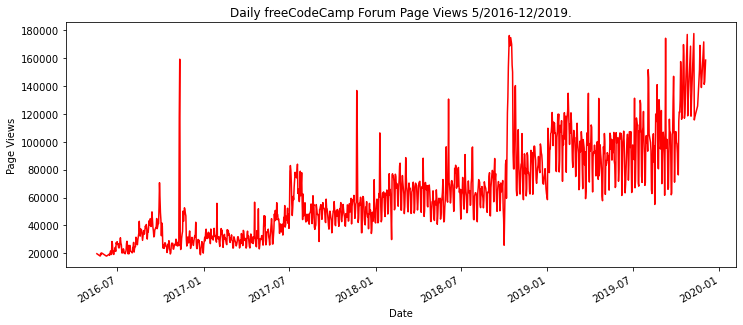

In [4]:
#Plotting the line chart using plt

plt.figure(figsize= (12,5))  #Setting up our figure
                       
df['value'].plot(color = 'red') #Plotting                       

plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019.") #Attaching labels on our plot
plt.xlabel("Date")
plt.ylabel("Page Views")

plt.show()

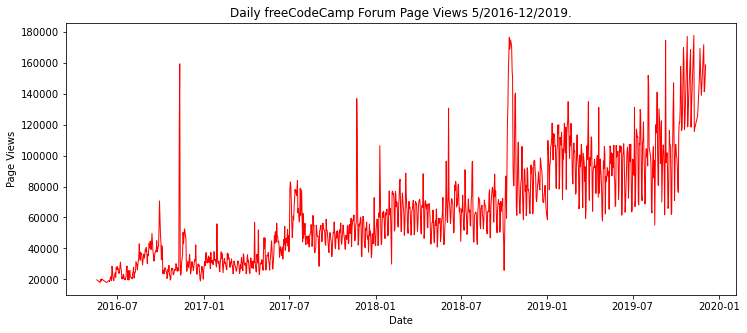

In [67]:
#Method 2, using the axis plotting

fig,ax = plt.subplots(figsize =(12,5)) #setting up the figure with axes

ax.plot(df.index, df['value'], color = 'r', linewidth = 1) #Plotting

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019.")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

fig.savefig("Line Plot.png")

Create a draw_bar_plot function that draws a bar chart similar to"examples/Figure_2.png". 

It should show average daily page views for each month grouped by year.

The legend should show month labels and have a title of Months.

On the chart, the label on the x axis should be Years the label on the y axis should be Average Page Views.

C:\Users\Sicelo\AppData\Local\Temp\ipykernel_6096\2944489200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
C:\Users\Sicelo\AppData\Local\Temp\ipykernel_6096\2944489200.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year


month             1              2             3             4             5   \
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

month            6             7              8             9              10  \
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

month             11      

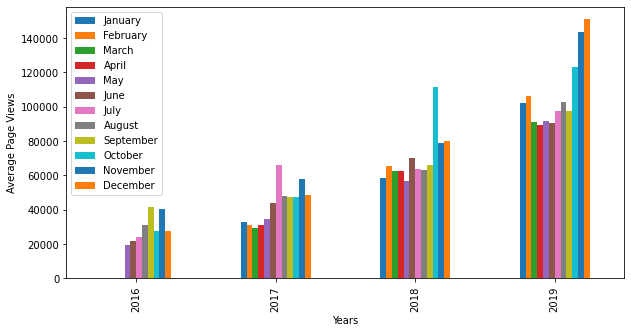

In [16]:
#For this question we will have to wrangle our data first

#Firstly recall that our date column is already serving as our index

#So we will subset months and year by making them some separate column series

df['month'] = df.index.month
df['year'] = df.index.year


#creating a dataframe for plotting our bar graph
df_bar = df.groupby(['year', 'month'])['value'].mean()


df_bar = df_bar.unstack()

#Drawing a plot...here we chose to plot using pandas
fig = df_bar.plot.bar( figsize = (10, 5), ylabel = "Average Page Views", xlabel = "Years",legend = True).figure

#After viewing your plot now customize the legend
plt.legend(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

#customizing our axes ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


fig.savefig("bar_plot.png")



In [55]:
#Out of interest lets determine the maximum page view for each year month wise

df = pd.read_csv("C:/Users/Sicelo/Documents/FreeCodeCamp Projects/Page View Time Series Visualizer/fcc-forum-pageviews.csv",parse_dates = ["date"], index_col= 'date')
df = df[  (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))  ]

df['month'] = df.index.month
df['year'] = df.index.year

df = df.groupby(['year', 'month'])['value'].mean()

df = df.reset_index()

#lets create a months key dictionary

month = { "1": "January", "2": "February","3":"March", "4": "April", "5": "May", "6" : "June", "7": "July", "8": "August"
         , "9": "September", "10": "October", "11": "November", "12": "December"}

df_2016 = df[  df['year'] == 2016]
df_2016 = df_2016.set_index('month')
print("The month with the highest avg page views for the year 2016 is ", month[str(df_2016['value'].idxmax())])

df_2017 = df[  df['year'] == 2017]
df_2017 = df_2017.set_index('month')
print("The month with the highest avg page views for the year 2017 is ", month[str(df_2017['value'].idxmax())])

df_2018 = df[  df['year'] == 2018]
df_2018 = df_2018.set_index('month')
print("The month with the highest avg page views for the year 2018 is ", month[str(df_2018['value'].idxmax())])

df_2019 = df[  df['year'] == 2019]
df_2019 = df_2019.set_index('month')
print("The month with the highest avg page views for the year 2019 is ", month[str(df_2019['value'].idxmax())])



The month with the highest avg page views for the year 2016 is  September
The month with the highest avg page views for the year 2017 is  July
The month with the highest avg page views for the year 2018 is  October
The month with the highest avg page views for the year 2019 is  December


In [60]:
#Alternatively we can use a For which makes it more interesting

df = pd.read_csv("C:/Users/Sicelo/Documents/FreeCodeCamp Projects/Page View Time Series Visualizer/fcc-forum-pageviews.csv",parse_dates = ["date"], index_col= 'date')
df = df[  (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))  ]

df['month'] = df.index.month
df['year'] = df.index.year

df = df.groupby(['year', 'month'])['value'].mean()

df = df.reset_index()

#lets create a months key dictionary

month = { "1": "January", "2": "February","3":"March", "4": "April", "5": "May", "6" : "June", "7": "July", "8": "August"
         , "9": "September", "10": "October", "11": "November", "12": "December"}

years = list(set(df['year'].values))

for year in years:
    df1 = df[  df['year'] == year]
    df1 = df1.set_index('month')
    print("The month with the highest avg page views for the year ", year ,"is", month[str(df1['value'].idxmax())])
    df = df.copy() #this continuesly updates our dataframe to the originally created dataframe within our loop



The month with the highest avg page views for the year  2016 is September
The month with the highest avg page views for the year  2017 is July
The month with the highest avg page views for the year  2018 is October
The month with the highest avg page views for the year  2019 is December


Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". 

These box plots should show how the values are distributed within a given year or month and how it compares over time.

The title of the fi rst chart should be Year-wise Box Plot (Trend)  and the title of the second chart should be Month-wise Box Plot (Seasonality). 

Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly

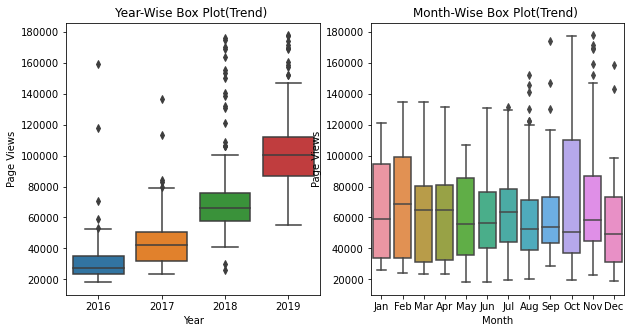

In [69]:
#Preparing our data for plotting 

df = pd.read_csv("C:/Users/Sicelo/Documents/FreeCodeCamp Projects/Page View Time Series Visualizer/fcc-forum-pageviews.csv",parse_dates = ["date"], index_col= 'date')

df = df[  (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))  ]

df['month'] = df.index.month
df['year'] = df.index.year

df_box = df.copy() #we recall our original dataframe
df_box.reset_index(inplace = True) #this ensures that our newly created dataframe is updated!

df_box['year'] = [d.year for d in df_box['date']]          #creating a list by subsetting years from our dates
df_box['month'] = [d.strftime("%b") for d in df_box['date']]    #creating a list by subsetting months from our dates

#To ensure that our months start from Jan to December as required 

df_box['month_num'] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=  (10, 5))

axes[0] = sns.boxplot( x= df_box["year"], y = df_box["value"],  ax = axes[0]) #plot 1
axes[1] = sns.boxplot( x= df_box["month"], y = df_box["value"],  ax = axes[1]) #plot 2

#Now lets attach labels to these plots

axes[0].set_title("Year-Wise Box Plot(Trend) ")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")


axes[1].set_title("Month-Wise Box Plot(Trend) ")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

fig.savefig('box_plot.png')

